In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:36<00:00, 34.3MB/s]
100% 1.06G/1.06G [00:36<00:00, 31.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
#https://keras.io/api/data_loading/image/
#generators
train_df = keras.utils.image_dataset_from_directory(
           directory = '/content/train',
          labels="inferred",
          label_mode="int",
          class_names=None,
          color_mode="rgb",
          batch_size=32,                              # for each step of the training process, the model will process 32 images at a time
          image_size=(256, 256)                       # generalizing all img size coz diff img diff size
)

validation_df = keras.utils.image_dataset_from_directory(
           directory = '/content/test',
          labels="inferred",
          label_mode="int",
          class_names=None,
          color_mode="rgb",
          batch_size=32,
          image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


image stored in form of numpy array (0-255)

Normalization needs to be done 0-1

In [ ]:
# Normalise
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)                           # Casts the normalized image data to a 32-bit floating point type
  return image, label

train_df = train_df.map(process)
validation_df = validation_df.map(process)

In [ ]:
# Creating CNN model
# MaxPooling2D : This downsamples the output from the convolution by taking the maximum value over a 2x2 window, effectively reducing the spatial dimensions by half.
# You might want to use padding='same' in the convolutional layers if you prefer keeping the spatial dimensions the same after convolution.

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))  # images of size 256x256 pixels with 3 color channels (RGB).
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))       # 64 filters of size 3x3
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))    # no padding is applied, so the output spatial dimensions will be smaller than the input.
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Flatten())   # Converts the 3D feature maps produced by the convolutional layers into a 1D vector that can be fed into the dense layers.

model.add(Dense(128, activation = 'relu'))  # 128 is the number of neurons in the dense layer, not filters.
model.add(Dense(64, activation = 'relu')) # The purpose of these neurons is to combine the features learned from earlier layers and help in decision-making
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_df, epochs = 10, validation_data = validation_df)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 81ms/step - accuracy: 0.6252 - loss: 0.6589 - val_accuracy: 0.7500 - val_loss: 0.5040
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 81ms/step - accuracy: 0.7577 - loss: 0.5002 - val_accuracy: 0.7668 - val_loss: 0.4979
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.8157 - loss: 0.4083 - val_accuracy: 0.7994 - val_loss: 0.4508
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.8861 - loss: 0.2700 - val_accuracy: 0.7822 - val_loss: 0.6166
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9400 - loss: 0.1517 - val_accuracy: 0.7846 - val_loss: 0.9392
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 79ms/step - accuracy: 0.9692 - loss: 0.0861 - val_accuracy: 0.7804 - val_loss: 1.0814
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 74ms/step - accuracy: 0.9771 - loss: 0.0651 - val_accuracy: 0.7876 - val_loss: 0.9541
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 81ms/step - accuracy: 0.9857 - loss: 0.0411 - 

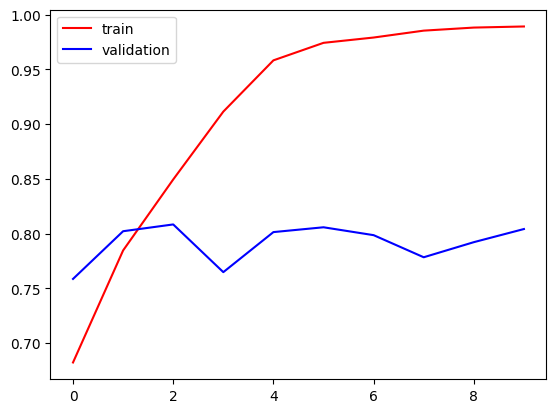

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

gap between the line depicts overfitting

accuracu around 80

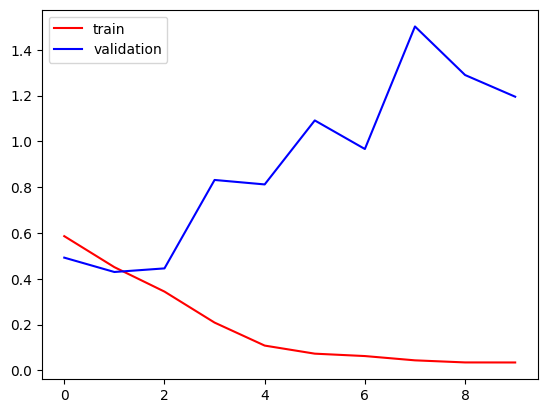

In [ ]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

As tne no of epoch incs training loss decs but test loss incs--- overfitting

In [ ]:
#                                          ....................:ways to reduce overfitting:..................

# Add more data
# Data Augmentation
# L1 L2 regularization
# Dropout                       v
# Batch Normalization           v
# Reduce Complexity

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
train_df = keras.utils.image_dataset_from_directory(
           directory = '/content/train',
          labels="inferred",
          label_mode="int",                          # convert cat 0 dog 1
          batch_size=32,
          image_size=(256, 256)                       # generalizing all imgs coz diff img diff size
)

validation_df = keras.utils.image_dataset_from_directory(
           directory = '/content/test',
          labels="inferred",
          label_mode="int",                          # convert cat 0 dog 1
          batch_size=32,
          image_size=(256, 256)                       # generalizing all imgs coz diff img diff size
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalise
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_df = train_df.map(process)
validation_df = validation_df.map(process)

In [ ]:
# creating CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())                                                          # Normaizes the variables helps in faster convergence
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))                                                                   # Similar to ANN
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_df, epochs = 10, validation_data = validation_df)       # all process will be followed by train and test data

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 86ms/step - accuracy: 0.5597 - loss: 2.4367 - val_accuracy: 0.5934 - val_loss: 0.6749
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 81ms/step - accuracy: 0.6736 - loss: 0.6110 - val_accuracy: 0.7252 - val_loss: 0.5326
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7413 - loss: 0.5338 - val_accuracy: 0.7190 - val_loss: 0.5577
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 83ms/step - accuracy: 0.7903 - loss: 0.4478 - val_accuracy: 0.7858 - val_loss: 0.4784
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 81ms/step - accuracy: 0.8289 - loss: 0.3835 - val_accuracy: 0.7830 - val_loss: 0.4919
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8635 - loss: 0.3183 - val_accuracy: 0.7868 - val_loss: 0.4819
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.8981 - loss: 0.2460 - val_accuracy: 0.7886 - val_loss: 0.6837
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 79ms/step - accuracy: 0.9348 - loss: 0.1686 - 

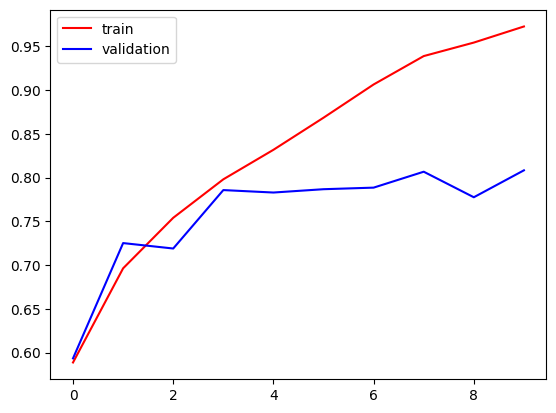

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

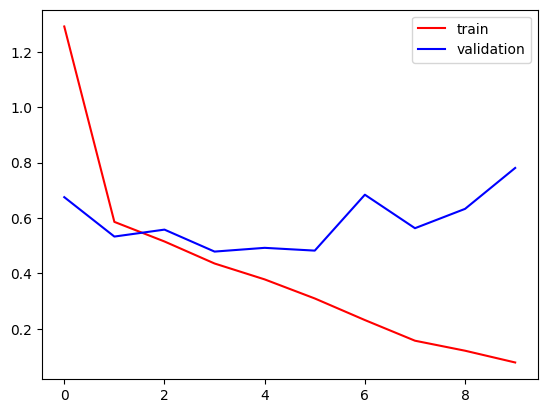

In [ ]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/Golde33443.jpg')

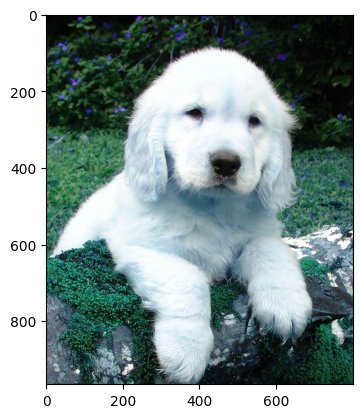

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [ ]:
test_img.shape

(965, 800, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))              #The target size

In [ ]:
# 1: The batch size. Here, you're creating a batch of 1 image (because neural networks in TensorFlow/Keras typically expect input in batches).
# 256, 256: The image width and height after resizing.
# 3: The number of channels (for RGB images, it's 3).
#.............................4D image.............................

test_input = test_img.reshape((1, 256, 256, 3))

In [ ]:
prediction = model.predict(test_input)
if prediction[0] > 0.5:
    print("It's a dog")
else:
    print("It's a cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
It's a dog
